#WebMD Drug Reviews- The dataset provides user reviews on specific drugs along with related conditions, side effects, age, sex, and ratings reflecting overall patient satisfaction.

![image](https://i.imgur.com/5ICUzzE.jpeg)

#ABOUT THE DATASET

1.Drug : name of drug

2.DrugId : drug id

3.Condition : name of condition

4.Review : patient review

5.Side : side effects associated with drug 

6. EaseOfUse : 5 star rating

7. Effectiveness : 5 star rating

8. Satisfaction : 5 star rating

9.Date : date of review entry

10. UsefulCount: number of users who found review 
useful.

11.Age : age group range of user

12. Sex : gender of user


In [60]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [107]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [109]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [113]:
dr = pd.read_csv('webmd.csv')

#checking values for few data types:-The simplest way to check the data type of an object in Python is to use the built-in type() function. This function returns the data type of the given object. In the example above, the type() function returns the data type of each object, and we can see the output displayed as <class 'data_type'> .

In [114]:
dr.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [115]:
dr.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [119]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [121]:
dr.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [123]:
dr.dropna()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [124]:
dr.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [127]:
dr['DrugId'].value_counts()

DrugId
6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: count, Length: 6572, dtype: int64

In [129]:
dr.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.00,362806.00,362806.00,362806.00,362806.00
mean,36879.37,4.02,3.53,3.14,6.74
std,52624.41,1.32,1.46,1.61,9.32
min,1.00,1.00,1.00,1.00,0.00
25%,4896.00,3.00,3.00,1.00,1.00
50%,9548.00,5.00,4.00,3.00,4.00
75%,63522.00,5.00,5.00,5.00,9.00
max,178546.00,10.00,10.00,10.00,255.00


In [131]:
dr.shape

(362806, 12)

In [133]:
dr.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [135]:
pd.options.display.float_format = '{:.2f}'.format
dr.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.00,362806.00,362806.00,362806.00,362806.00
mean,36879.37,4.02,3.53,3.14,6.74
std,52624.41,1.32,1.46,1.61,9.32
min,1.00,1.00,1.00,1.00,0.00
25%,4896.00,3.00,3.00,1.00,1.00
50%,9548.00,5.00,4.00,3.00,4.00
75%,63522.00,5.00,5.00,5.00,9.00
max,178546.00,10.00,10.00,10.00,255.00


#Exploratory Data Analysis:-Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

##Univariate Data Analysis
Univariate analysis is used to analyze the data of single variable.Here we will analyze using histplot.


array([[<Axes: title={'center': 'DrugId'}>,
        <Axes: title={'center': 'EaseofUse'}>],
       [<Axes: title={'center': 'Effectiveness'}>,
        <Axes: title={'center': 'Satisfaction'}>],
       [<Axes: title={'center': 'UsefulCount'}>, <Axes: >]], dtype=object)

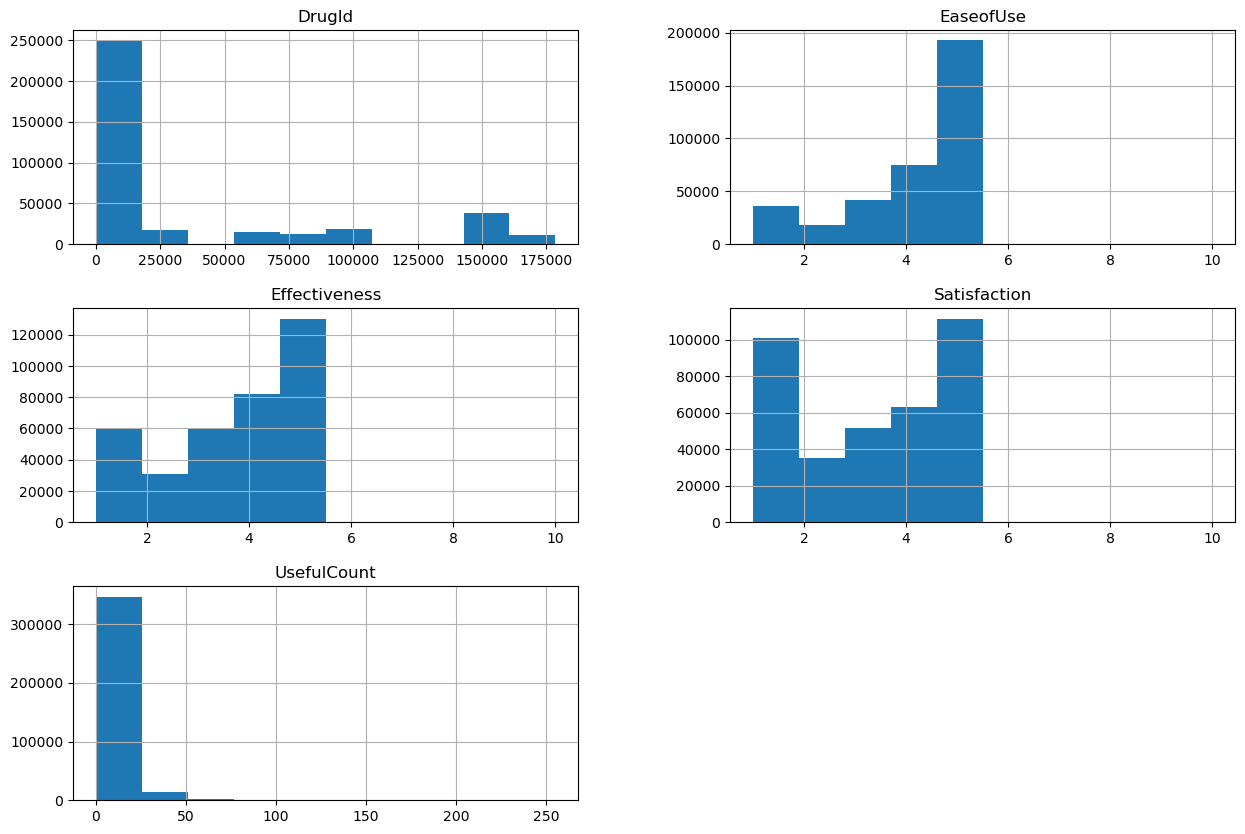

In [137]:
dr.hist(figsize=(15,10))

We have not seen any outlier in this case but if We could had seen  some outliers in this plot.

We have use capping and flooring for these columns.

##Capping In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number.

##Flooring is replacing all values falling below a certain theoretical maximum or upper control limit (UCL) by the LCL value. 

#Bivariate Data Analysis

##Calculate correlation matrix

In [213]:
dr.corr



<bound method DataFrame.corr of                Age      Condition        Date                          Drug  \
0       75 or over    Stuffy Nose   9/21/2014                  25dph-7.5peh   
1            25-34  Cold Symptoms   1/13/2011                  25dph-7.5peh   
2            65-74          Other   7/16/2012  warfarin (bulk) 100 % powder   
3       75 or over          Other   9/23/2010  warfarin (bulk) 100 % powder   
4            35-44          Other    1/6/2009  warfarin (bulk) 100 % powder   
...            ...            ...         ...                           ...   
362801       55-64   Stop Smoking  11/14/2008                       chantix   
362802                      Other  11/14/2008                       chantix   
362803       25-34   Stop Smoking  11/13/2008                       chantix   
362804       55-64   Stop Smoking  11/13/2008                       chantix   
362805       45-54   Stop Smoking  11/12/2008                       chantix   

        DrugId  Eas

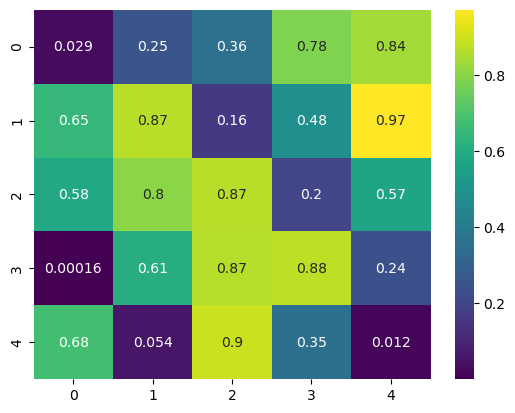

In [139]:
data = np.random.random((5, 5))

# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap='viridis', cbar=True)
plt.show()

In [140]:
for i in dr.columns : 
    print(i)
    print(dr[i].value_counts())
    print('-'*40)

Age
Age
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: count, dtype: int64
----------------------------------------
Condition
Condition
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer    

#CLUSTERING

In [155]:
k = 3

In [157]:
kmeans = KMeans(n_clusters=3)

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [167]:
 iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [168]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [171]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)

In [173]:
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [175]:
y_pred = svm_classifier.predict(X_test)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


In [179]:
dr.shape

(362806, 12)

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [183]:
y_pred = model.predict(X_test)
y_pred

array([ 2.14815281,  2.04391952,  1.58875171,  1.70211536,  1.38077987,
       -0.04160975,  2.0030658 ,  1.34843315, -0.01995442,  1.20603382,
       -0.06300107,  0.05149674,  1.99786118,  1.1671169 ,  0.95644914,
        1.78221789,  2.04425142, -0.01381963,  1.26121392, -0.01481803,
        1.83932655,  0.17444192, -0.1244356 ,  1.98560809, -0.08746373,
        1.17204891, -0.10104747,  1.57236064,  0.0704644 , -0.01201072])

analysis

![animage](https://i.imgur.com/0BXqmpX.jpeg)

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_pred, y_test))

0.03515302779586605


In [189]:
print(mean_absolute_error(y_pred, y_test))

0.13749630196273427


In [191]:
r2_score(y_pred, y_test)

0.9516269808592462

conclusion

The given data has been processed under the machine learning model and presents us the regression of the data. the customers data is 0.97 times less accurate . the correlation between all the features has been represented in the heatmap. data analysis has been performed the RFM analysis has also been performed to check the recent frequency and monetry value like the recent is more around 100-150 days.

clustering has been done on the data. A machine learning model has been build with the help pf the data and the prediction has also been generated under the test.

